# Module 4: Classification
**Auteur:** Dr. Michel MAMA TOULOU, Expert en Intelligence Artificielle

## 4.1 Métriques d'Évaluation pour la Classification

### Classification Binaire vs Multiclasse

La classification peut être:
- **Binaire**: deux classes (ex: spam/non-spam)
- **Multiclasse**: plus de deux classes (ex: classification d'images)

### Métriques Principales

*   **Accuracy (Précision globale):**
    - **Formule:** (TP + TN) / (TP + TN + FP + FN)
    - **Utilisation:** Proportion de prédictions correctes
    - **Limites:** Trompeuse avec des classes déséquilibrées

*   **Precision (Précision):**
    - **Formule:** TP / (TP + FP)
    - **Macro-Precision:** Moyenne des précisions par classe
    - **Micro-Precision:** Précision globale pondérée
    - **Utilisation:** Mesure la qualité des prédictions positives

*   **Recall (Rappel):**
    - **Formule:** TP / (TP + FN)
    - **Utilisation:** Mesure la capacité à trouver tous les cas positifs

*   **F1-Score:**
    - **Formule:** 2 * (Precision * Recall) / (Precision + Recall)
    - **Utilisation:** Moyenne harmonique entre précision et rappel

*   **Classification Report:**
    - Résumé complet incluant precision, recall, f1-score par classe
    - Moyennes macro et micro pour les métriques globales

c:\Users\michel.bertrand.mama\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


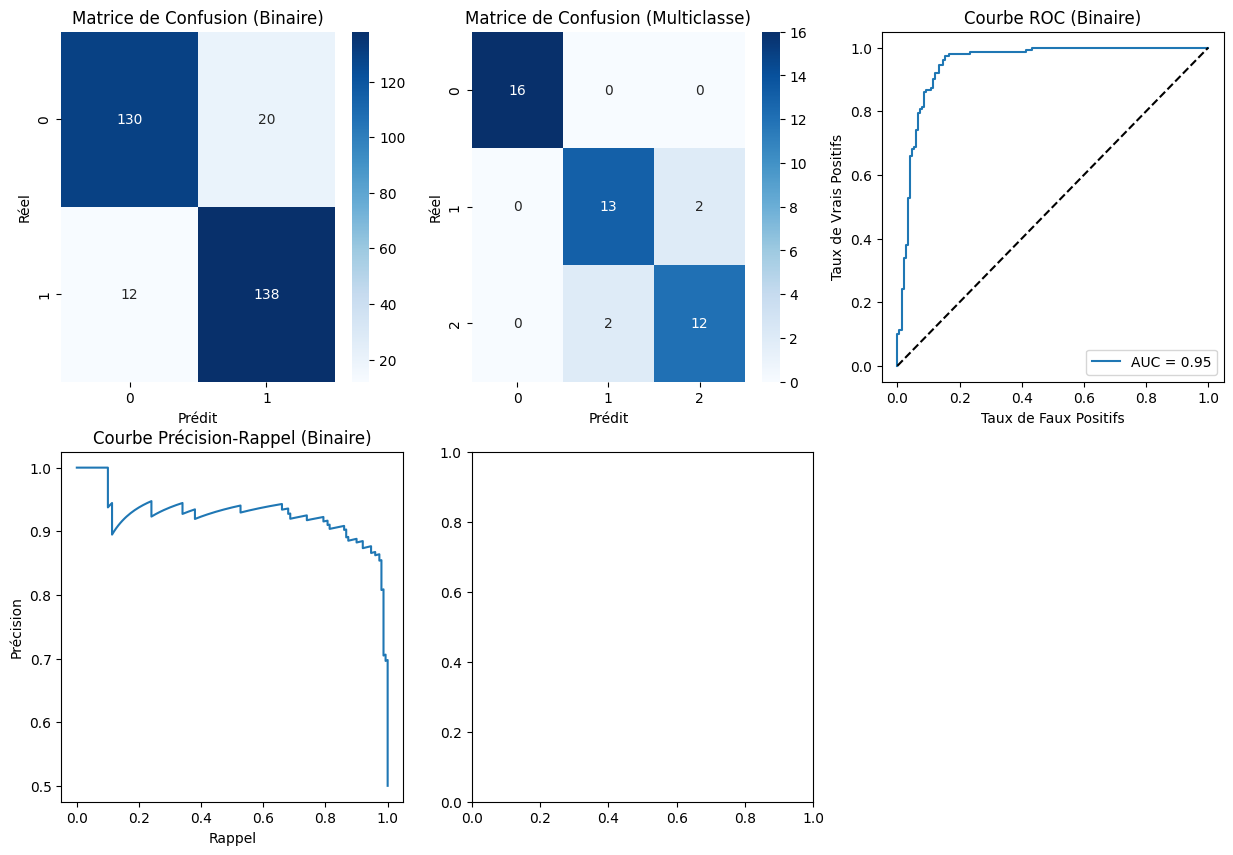

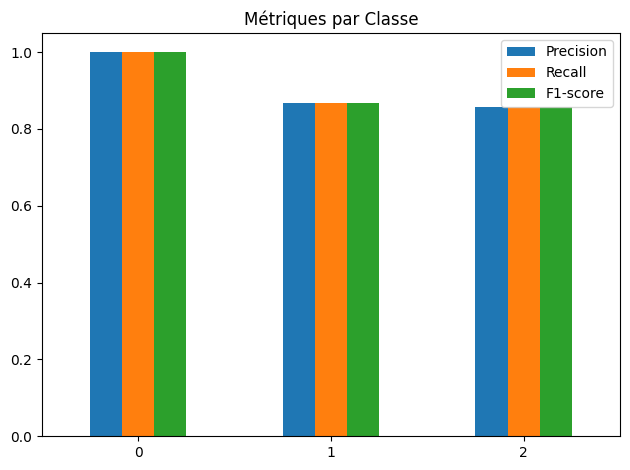


Rapport de Classification (Binaire):
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.87      0.92      0.90       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


Rapport de Classification (Multiclasse):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.87      0.87        15
           2       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45


Métriques Globales Multiclasse:
Macro Precision: 0.908
Micro Precision: 0.911
Macro Recall: 0.908
Micro Recall: 0.911


In [ ]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\notebooks\04_classification_methods.ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                           precision_recall_curve, roc_curve, roc_auc_score,
                           precision_score, recall_score, f1_score)

# 1. Exemple Binaire
X_bin, y_bin = make_classification(n_samples=1000, n_classes=2, random_state=42)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.3)


model_bin = LogisticRegression()

model_bin.fit(X_train_bin, y_train_bin)

y_pred_bin = model_bin.predict(X_test_bin)
# Probabilités pour la courbe ROC et Précision-Rappel
y_prob_bin = model_bin.predict_proba(X_test_bin)[:, 1]

# 2. Exemple Multiclasse
iris = load_iris()
X_multi, y_multi = iris.data, iris.target

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3)

model_multi = LogisticRegression(multi_class='ovr')

model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)

# Visualisations
plt.figure(figsize=(15, 10))

# 1. Matrices de confusion
plt.subplot(2, 3, 1)
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion (Binaire)')
plt.xlabel('Prédit')
plt.ylabel('Réel')

plt.subplot(2, 3, 2)
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion (Multiclasse)')
plt.xlabel('Prédit')
plt.ylabel('Réel')

# 2. Courbe ROC (Binaire)
plt.subplot(2, 3, 3)
fpr, tpr, _ = roc_curve(y_test_bin, y_prob_bin)
auc = roc_auc_score(y_test_bin, y_prob_bin)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend()

# 3. Précision-Rappel (Binaire)
plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test_bin, y_prob_bin)
plt.plot(recall, precision)
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel (Binaire)')

# 4. Métriques par classe (Multiclasse)
plt.subplot(2, 3, 5)
metrics_multi = pd.DataFrame({
    'Precision': precision_score(y_test_multi, y_pred_multi, average=None),
    'Recall': recall_score(y_test_multi, y_pred_multi, average=None),
    'F1-score': f1_score(y_test_multi, y_pred_multi, average=None)
})
metrics_multi.plot(kind='bar')
plt.title('Métriques par Classe')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Afficher les rapports de classification
print("\nRapport de Classification (Binaire):")
print(classification_report(y_test_bin, y_pred_bin))

print("\nRapport de Classification (Multiclasse):")
print(classification_report(y_test_multi, y_pred_multi))

# Calculer et afficher les métriques macro et micro
print("\nMétriques Globales Multiclasse:")
print(f"Macro Precision: {precision_score(y_test_multi, y_pred_multi, average='macro'):.3f}")
print(f"Micro Precision: {precision_score(y_test_multi, y_pred_multi, average='micro'):.3f}")
print(f"Macro Recall: {recall_score(y_test_multi, y_pred_multi, average='macro'):.3f}")
print(f"Micro Recall: {recall_score(y_test_multi, y_pred_multi, average='micro'):.3f}")

## 4.1 Classificateurs Linéaires

### Analyse discriminante linéaire (LDA)

L'analyse discriminante linéaire (LDA) est une méthode de classification qui cherche à trouver la combinaison linéaire de features qui sépare le mieux deux ou plusieurs classes. Elle suppose que les données de chaque classe suivent une distribution gaussienne et que les classes ont la même matrice de covariance.

L'objectif de LDA est de projeter les données sur un espace de dimension inférieure tout en maximisant la séparation entre les classes.

### Hypothèses gaussiennes

L'analyse discriminante linéaire (LDA) repose sur l'hypothèse que les données de chaque classe suivent une distribution gaussienne (normale). De plus, LDA suppose que toutes les classes ont la même matrice de covariance.

Ces hypothèses permettent de simplifier le problème de classification et de trouver une solution analytique. Cependant, si ces hypothèses ne sont pas satisfaites, la performance de LDA peut être dégradée.

### Frontières de décision

Les frontières de décision sont les surfaces qui séparent les différentes classes dans un espace de features. Dans le cas de LDA, les frontières de décision sont linéaires, car elles sont définies par des combinaisons linéaires de features.

La position et l'orientation des frontières de décision sont déterminées par les moyennes et les matrices de covariance des classes.

### Machines à vecteurs de support (SVM)

Les machines à vecteurs de support (SVM) sont une autre méthode de classification linéaire qui cherche à trouver l'hyperplan qui sépare le mieux deux classes. Contrairement à LDA, SVM ne fait pas d'hypothèses sur la distribution des données.

L'objectif de SVM est de maximiser la marge entre les classes, c'est-à-dire la distance entre l'hyperplan et les points les plus proches de chaque classe (vecteurs de support).

### Marge maximale

La marge maximale est un concept clé dans les machines à vecteurs de support (SVM). Elle représente la distance entre l'hyperplan de séparation et les points les plus proches de chaque classe (vecteurs de support).

L'objectif de SVM est de trouver l'hyperplan qui maximise cette marge, car cela permet d'obtenir une meilleure généralisation et une meilleure robustesse aux variations des données.

### Fonctions noyaux

Les fonctions noyaux (kernels) sont utilisées dans les SVM pour transformer les données dans un espace de dimension supérieure où il est plus facile de séparer les classes. Elles permettent de traiter des problèmes non linéaires en utilisant des méthodes linéaires.

Les fonctions noyaux courantes comprennent :

*   **Noyau linéaire :** Correspond à une SVM linéaire.
*   **Noyau polynomial :** Permet de créer des frontières de décision polynomiales.
*   **Noyau RBF (radial basis function) :** Permet de créer des frontières de décision complexes et non linéaires.

Voici un exemple en Python utilisant `scikit-learn` :

In [2]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\classification_methods.ipynb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Charger les données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle SVM avec un noyau RBF
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Entraîner le modèle
svm_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision:", accuracy)

Précision: 1.0


## 4.2 Méthodes par Ensembles

### Arbres de décision

Les arbres de décision sont une méthode de classification et de régression qui divise les données en sous-ensembles de plus en plus homogènes en fonction des valeurs des features. Chaque nœud de l'arbre représente une décision basée sur une feature, et chaque feuille représente une classe ou une valeur prédite.

Les arbres de décision sont faciles à interpréter et peuvent traiter des données numériques et catégorielles. Cependant, ils sont susceptibles de surapprendre les données si ils ne sont pas correctement élagués.

### Critères de split (Gini, entropy)

Les critères de split sont utilisés pour déterminer quelle feature utiliser pour diviser les données à chaque nœud de l'arbre de décision. Les critères courants comprennent :

*   **Indice de Gini :** Mesure l'impureté d'un ensemble de données. Il est utilisé pour minimiser la probabilité de mal classer un échantillon aléatoire.
*   **Entropie :** Mesure le désordre ou l'incertitude d'un ensemble de données. Il est utilisé pour maximiser le gain d'information, c'est-à-dire la réduction de l'entropie après la division.

Voici un exemple en Python utilisant `scikit-learn` :

In [3]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\classification_methods.ipynb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger les données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle d'arbre de décision avec le critère de Gini
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train, y_train)
y_pred_gini = gini_tree.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Précision avec Gini:", accuracy_gini)

# Créer un modèle d'arbre de décision avec le critère d'entropie
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(X_train, y_train)
y_pred_entropy = entropy_tree.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Précision avec entropie:", accuracy_entropy)

Précision avec Gini: 1.0
Précision avec entropie: 0.9777777777777777


### Élagage

L'élagage (pruning) est une technique utilisée pour réduire la complexité d'un arbre de décision et éviter le surapprentissage. Il consiste à supprimer les branches ou les nœuds qui ne contribuent pas significativement à la performance du modèle.

Les méthodes d'élagage courantes comprennent :

*   **Élagage pré-élagage (pre-pruning) :** Arrêter la croissance de l'arbre avant qu'il n'atteigne sa taille maximale en utilisant des critères tels que la profondeur maximale ou le nombre minimal d'échantillons par feuille.
*   **Élagage post-élagage (post-pruning) :** Laisser l'arbre croître jusqu'à sa taille maximale, puis supprimer les branches ou les nœuds qui ont le moins d'impact sur la performance.

### Random Forests

Les Random Forests sont une méthode d'ensemble qui combine plusieurs arbres de décision pour améliorer la performance et la robustesse. Chaque arbre est entraîné sur un sous-ensemble aléatoire des données et des features, ce qui permet de réduire la variance et d'éviter le surapprentissage.

Les Random Forests sont l'une des méthodes de classification les plus populaires et les plus performantes.

### Bagging et feature randomness

Le bagging (bootstrap aggregating) est une technique d'ensemble qui consiste à entraîner plusieurs modèles sur des sous-ensembles aléatoires des données (avec remplacement). Cela permet de réduire la variance et d'améliorer la généralisation.

Le feature randomness consiste à sélectionner un sous-ensemble aléatoire de features pour chaque arbre de décision dans un Random Forest. Cela permet de réduire la corrélation entre les arbres et d'améliorer la performance.

### Gradient Boosting

Le gradient boosting est une méthode d'ensemble qui construit un modèle de manière itérative en ajoutant des arbres de décision qui corrigent les erreurs des arbres précédents. Chaque arbre est entraîné sur les résidus (erreurs) du modèle actuel, ce qui permet de se concentrer sur les exemples les plus difficiles à classer.

Le gradient boosting est une méthode très performante, mais elle peut être sensible au surapprentissage si elle n'est pas correctement réglée.

### AdaBoost, XGBoost

AdaBoost (Adaptive Boosting) et XGBoost (Extreme Gradient Boosting) sont des implémentations populaires de gradient boosting.

*   **AdaBoost :** Attribue des poids différents aux exemples en fonction de leur difficulté de classification. Les exemples mal classés reçoivent des poids plus élevés, ce qui permet aux arbres suivants de se concentrer sur ces exemples.
*   **XGBoost :** Une implémentation optimisée de gradient boosting qui utilise des techniques de régularisation et de parallélisation pour améliorer la performance et la robustesse.

Voici un exemple en Python utilisant `scikit-learn` :

In [ ]:
# filepath: c:\Users\michel.bertrand.mama\Documents\AYNID\classification_methods.ipynb
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger les données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Précision AdaBoost:", accuracy_adaboost)

# Créer un modèle Gradient Boosting
gradientboost_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gradientboost_model.fit(X_train, y_train)
y_pred_gradientboost = gradientboost_model.predict(X_test)
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
print("Précision Gradient Boosting:", accuracy_gradientboost)

Précision AdaBoost: 1.0
Précision Gradient Boosting: 1.0


### Fonction de perte et apprentissage additif

La fonction de perte (loss function) est une fonction qui mesure l'erreur d'un modèle. L'objectif de l'apprentissage est de minimiser cette fonction de perte.

L'apprentissage additif est une technique utilisée dans le gradient boosting pour construire un modèle de manière itérative en ajoutant des arbres de décision qui minimisent la fonction de perte. Chaque arbre est entraîné sur les résidus (erreurs) du modèle actuel, ce qui permet de se concentrer sur les exemples les plus difficiles à classer.